## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset

df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,78,82,76
1,female,group C,some high school,standard,none,55,60,60
2,female,group C,some college,standard,none,60,62,60
3,male,group E,some high school,free/reduced,completed,62,70,71
4,male,group D,associate's degree,free/reduced,none,47,44,44


In [5]:
df.shape

(1000, 8)

# 3. Data Checks to perform
    1.Check Missing values
    2.Check Duplicates
    3.Check Data type
    4.Check the number of unique values of each column
    5.Check statistics of data set
    6.Check various categories present in the different categorical column

In [7]:
# Check missing values
df.isnull().sum()  # or df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Observation : 
#### There are no missing values 

In [8]:
# Chek Duplicates
df.duplicated().sum()

0

There are no duplicates values in the dataset

In [9]:
# Check Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Check the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     76
reading score                  70
writing score                  73
dtype: int64

In [11]:
# Check statistics of data set
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.029000,69.694000,68.503000
std,15.251714,14.790914,15.466972
min,21.000000,21.000000,13.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,68.000000
75%,78.000000,81.000000,80.000000
max,100.000000,100.000000,100.000000


 ## Insight
- From the above description of numerical data, all means are close to each other between 66 and 69
- All the standard deviation are also close between 14.7-15.4
- While there is a minimum of 21 for math, other having 21 and 13

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,78,82,76
1,female,group C,some high school,standard,none,55,60,60
2,female,group C,some college,standard,none,60,62,60
3,male,group E,some high school,free/reduced,completed,62,70,71
4,male,group D,associate's degree,free/reduced,none,47,44,44


In [13]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group C,associate's degree,standard,completed,64,74,76
996,male,group C,some college,standard,none,63,70,68
997,female,group C,some college,standard,completed,48,56,60
998,female,group B,associate's degree,standard,completed,71,70,78
999,female,group D,master's degree,standard,none,90,96,97


In [14]:
# Segrregate numerical and categorical feature

categorical_feature = [feature for feature in df.columns if df[feature].dtype== 'O']
numerical_feature = [feature for feature in df.columns if df[feature].dtype!= 'O']

In [15]:
# Aggregate the total score with mean

df['total_score'] = (df['math score']+df['reading score']+df['writing score'])
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,some college,standard,none,78,82,76,236,78.666667
1,female,group C,some high school,standard,none,55,60,60,175,58.333333
2,female,group C,some college,standard,none,60,62,60,182,60.666667
3,male,group E,some high school,free/reduced,completed,62,70,71,203,67.666667
4,male,group D,associate's degree,free/reduced,none,47,44,44,135,45.000000


<Axes: xlabel='average', ylabel='Count'>

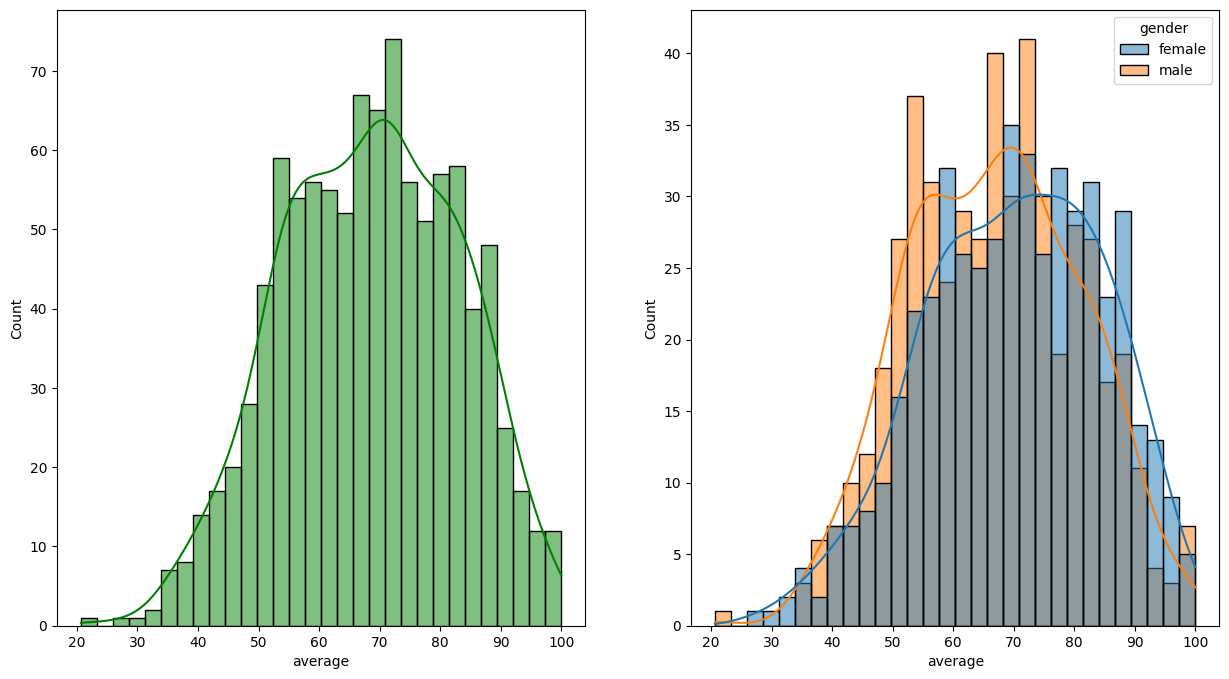

In [16]:
# Exploring more visualization
# kde = Kernal Density Estimator

plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average',bins=30, kde=True, hue='gender')

### Insights
- Female students tends to perform well than male student

<Axes: xlabel='average', ylabel='Count'>

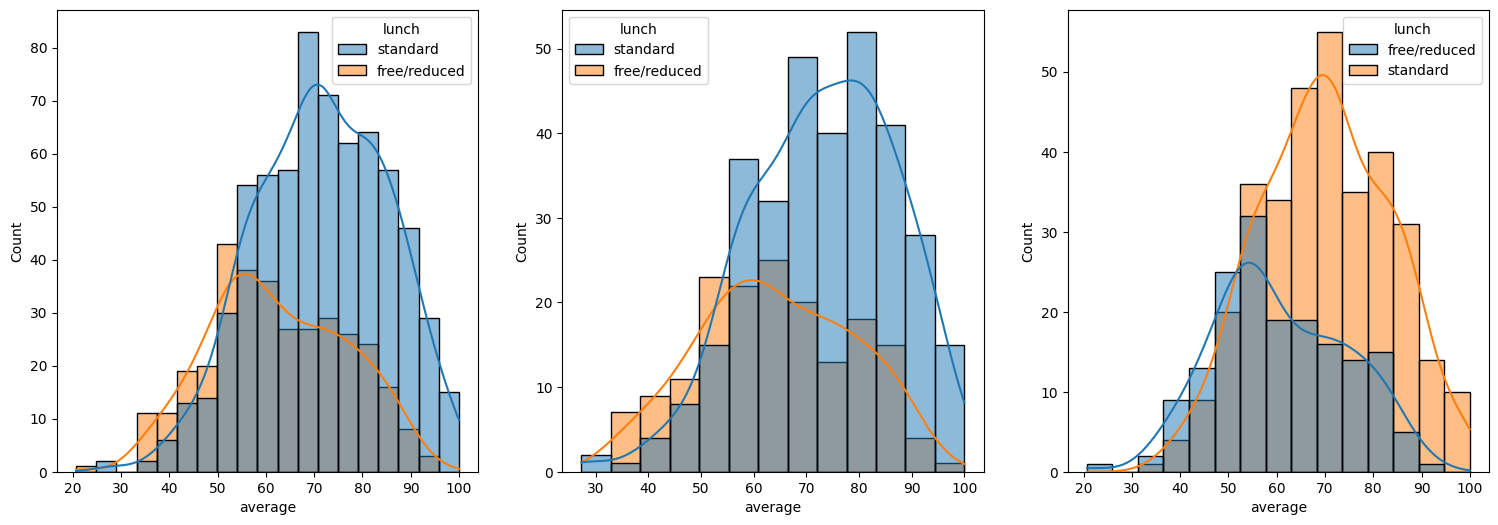

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

## insight
- Standard lunch help stuents perform well in exam
- Standard lunch helps perform well in exams be it male or female

<Axes: xlabel='average', ylabel='Count'>

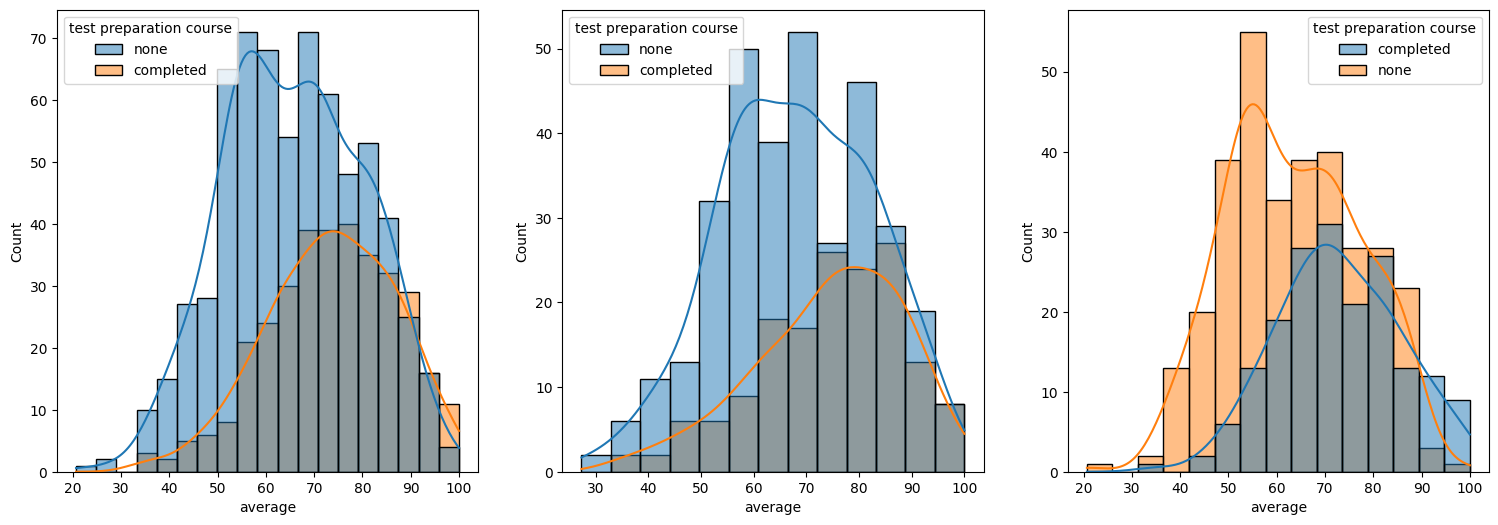

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='test preparation course')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='test preparation course')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='test preparation course')

<Axes: xlabel='average', ylabel='Count'>

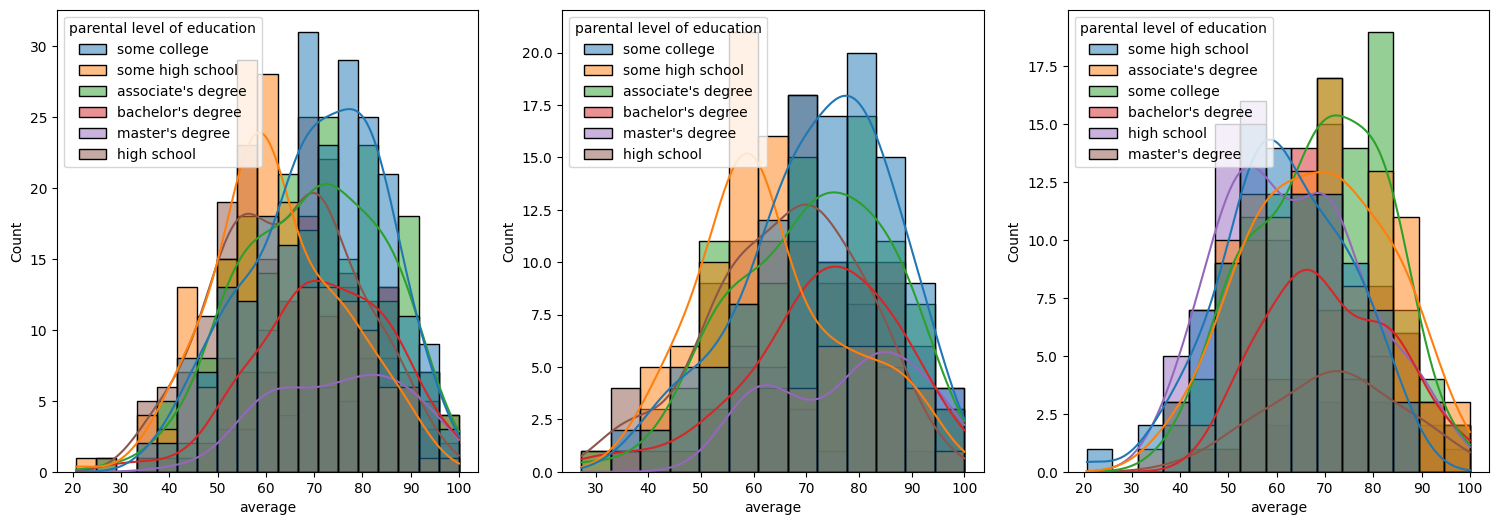

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

<Axes: >

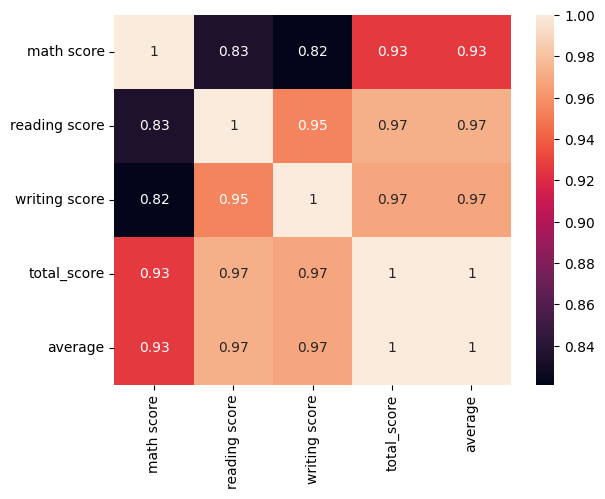

In [22]:
sns.heatmap(df.corr(), annot=True)